# Exercise Chapter 3 
Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import random
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pingouin as pg
import mistat
import os
os.environ['OUTDATED_IGNORE'] = '1'

# Exercise 15

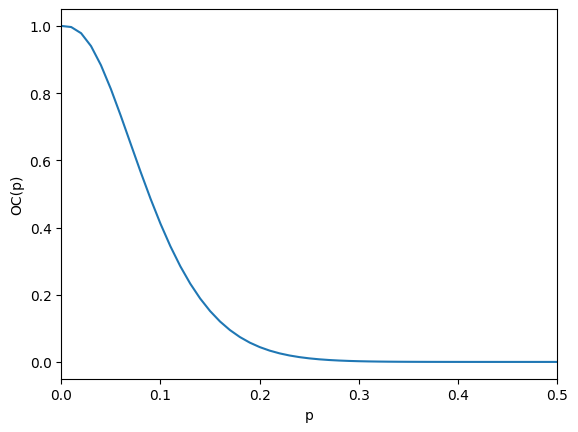

In [3]:
from mistat.acceptanceSampling import OperatingCharacteristics2c
X = OperatingCharacteristics2c(30, 2, oc_type='binomial')
df = pd.DataFrame({'p': X.pd, 'OC(p)': X.paccept})
ax = df.plot(x='p', y='OC(p)', legend=False)
ax.set_ylabel('OC(p)')
ax.set_xlim(0, 0.5)
plt.show()

# Exercise 18

In [4]:
socell = mistat.load_data('SOCELL')
t1 = socell['t1']

statistic, pvalue = stats.ttest_1samp(t1, 4.0)
# divide pvalue by two for one-sided test
pvalue = pvalue / 2
print(f'pvalue {pvalue:.2f}')

pvalue 0.35


# Exercise 19

In [5]:
socell = mistat.load_data('SOCELL')
t2 = socell['t2']

statistic, pvalue = stats.ttest_1samp(t2, 4.0)
# divide pvalue by two for one-sided test
pvalue = pvalue / 2
print(f'pvalue {pvalue:.2f}')

pvalue 0.03


# Exercise 20

In [6]:
delta = np.linspace(0, 1.0, 11)

a = np.sqrt(30)
b = 2.462 * ( 1 - 1/232)
f = np.sqrt(1 + 6.0614 / 58)
OC_delta = 1 - stats.norm.cdf((a * delta - b) / f)

In [7]:
  print('delta     OC')
  for delta, OC in zip(delta, OC_delta):
    print(f'{delta:.1f}   {OC:10.6f}')

delta     OC
0.0     0.990164
0.1     0.964958
0.2     0.901509
0.3     0.779063
0.4     0.597882
0.5     0.392312
0.6     0.213462
0.7     0.094149
0.8     0.033120
0.9     0.009188
1.0     0.001994


# Exercise 21

In [8]:
sigma2 = np.linspace(1, 2, 11)
OC_sigma2 = 1 - stats.poisson.cdf(30 / 2 - 1,
                            stats.chi2(30).ppf(0.90) / (2 * sigma2))

In [9]:
  print('sigma^2     OC')
  for s, OC in zip(sigma2, OC_sigma2):
    print(f'{s:.1f}   {OC:10.6f}')

sigma^2     OC
1.0     0.900000
1.1     0.810804
1.2     0.700684
1.3     0.582928
1.4     0.469471
1.5     0.368201
1.6     0.282781
1.7     0.213695
1.8     0.159540
1.9     0.118063
2.0     0.086834


# Exercise 22

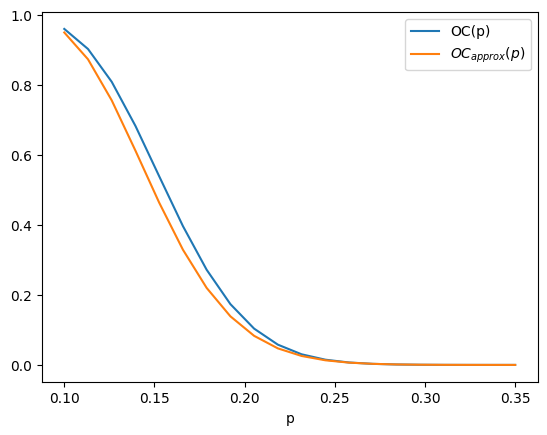

In [10]:
n = 100
p0 = 0.1
alpha = 0.05

c_alpha = stats.binom(n, p0).ppf(1 - alpha)
p = np.linspace(0.1, 0.35, 20)
OC_exact = stats.binom(n, p).cdf(c_alpha)

z_ma = stats.norm.ppf(1 - alpha)
q0 = 1- p0
pq = p * (1 - p)
OC_approx = 1 - stats.norm.cdf((p - p0) * np.sqrt((n / pq)) -
                               z_ma * np.sqrt(p0 * q0 / pq))
df = pd.DataFrame({
  'p': p,
  'OC(p)': OC_exact,
  '$OC_{approx}(p)$': OC_approx,
})
df.plot.line(x='p', y=['OC(p)', '$OC_{approx}(p)$'])
plt.show()

# Exercise 25

In [11]:
data = [20.74, 20.85, 20.54, 20.05, 20.08, 22.55, 19.61, 19.72,
        20.34, 20.37, 22.69, 20.79, 21.76, 21.94, 20.31, 21.38,
        20.42, 20.86, 18.80, 21.41]
alpha = 1 - 0.99

df = len(data) - 1
mean = np.mean(data)
sem = stats.sem(data)

print(stats.t.interval(1 - alpha, df, loc=mean, scale=sem))

(20.136889216656858, 21.38411078334315)


In [12]:
var = np.var(data, ddof=1)
print(df * var / stats.chi2(df).ppf(1 - alpha/2))
print(df * var / stats.chi2(df).ppf(alpha/2))

0.46795850248657883
2.6380728125212016


# Exercise 27

In [13]:
alpha = 1 - 0.95
X = 17
n = 20
F1 = stats.f(2*(n-X+1), 2*X).ppf(1 - alpha/2)
F2 = stats.f(2*(X+1), 2*(n-X)).ppf(1 - alpha/2)
pL = X / (X + (n-X+1) * F1)
pU = (X+1) * F2 / (n-X + (X+1) * F2)
print(pL, pU)

0.6210731734546859 0.9679290628145363


# Exercise 28

In [14]:
X = [14, 16, 11, 19, 11, 9, 12, 15, 14, 13]
alpha = 1 - 0.95
T_n = np.sum(X)

# exact solution
print(stats.chi2(2 * T_n + 2).ppf(alpha/2) / (2 * len(X)))
print(stats.chi2(2 * T_n + 2).ppf(1 - alpha/2) / (2 * len(X)))

# approximate solution
nu = 2 * T_n + 2
print((nu + stats.norm.ppf(alpha/2) * np.sqrt(2 * nu)) / (2 * len(X)))
print((nu + stats.norm.ppf(1-alpha/2) * np.sqrt(2 * nu)) / (2 * len(X)))

11.318870163746238
15.870459268116013
11.222727638613012
15.777272361386988


# Exercise 30

In [15]:
yarnstrg = mistat.load_data('YARNSTRG')
n = len(yarnstrg)
Ybar = yarnstrg.mean()
S = yarnstrg.std()

alpha, beta = 0.025, 0.025
z_1a = stats.norm.ppf(1-alpha)
z_1b = stats.norm.ppf(1-beta)
z_a = stats.norm.ppf(alpha)
z_b = stats.norm.ppf(beta)

t_abn = (z_1b/(1 - z_1a**2/(2*n)) +
         z_1a*np.sqrt(1 + z_b**2/2 - z_1a**2/(2*n)) /
             (np.sqrt(n)*(1 - z_1a**2/(2*n))))

print(Ybar - t_abn*S, Ybar + t_abn*S)

0.7306652047594424 5.117020795240556


# Exercise 32

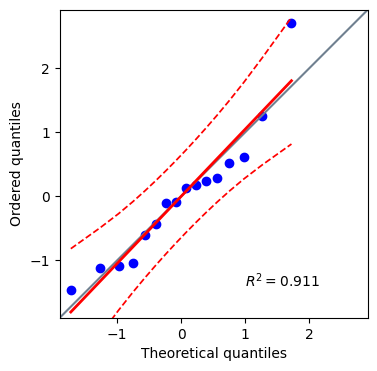

In [16]:
socell = mistat.load_data('SOCELL')
fig, ax = plt.subplots(figsize=[4, 4])
pg.qqplot(socell['t1'], ax=ax)
plt.show()

# Exercise 33

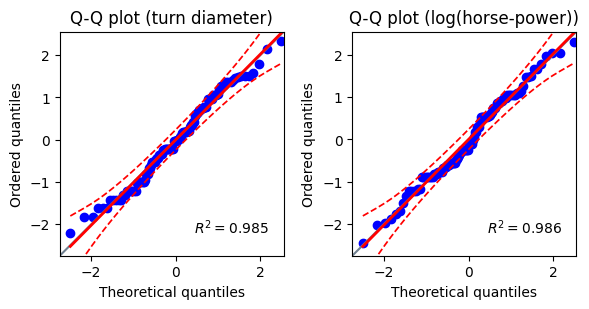

In [17]:
car = mistat.load_data('CAR')

fig, axes = plt.subplots(figsize=[6, 3], ncols=2)
pg.qqplot(car['turn'], ax=axes[0])
pg.qqplot(np.log(car['hp']), ax=axes[1])
axes[0].set_title('Q-Q plot (turn diameter)')
axes[1].set_title('Q-Q plot (log(horse-power))')
plt.tight_layout()
plt.show()

# Exercise 34

In [18]:
car = mistat.load_data('CAR')
turn = car['turn']
n = len(turn)
bins = [math.floor(turn.min()), *range(31, 41), math.ceil(turn.max())]
observed = pd.cut(car['turn'], bins, right=False).value_counts(sort=False)

dist = stats.norm(loc=turn.mean(), scale=turn.std())
expected = [n * (dist.cdf(idx.right) - dist.cdf(idx.left)) for idx in observed.index]
df = pd.DataFrame({
  'observed': observed,
  'expected': expected,
  '(O-E)^2/E': (observed-expected)**2/expected,
}, index=observed.index)
print(df)
chi2 = df['(O-E)^2/E'].sum()
print('chi2-statistic of fit', chi2)


df = len(bins) - 3
alpha = 1-0.95
print(f'chi2[{df-1}] for 95%', stats.chi2(df - 1).ppf(1-alpha))
print('p-value of observed statistic', 1 - stats.chi2(df - 1).cdf(chi2))

          observed   expected  (O-E)^2/E
turn                                    
[28, 31)        11   8.197333   0.958231
[31, 32)         8   6.318478   0.447500
[32, 33)         9   8.668695   0.012662
[33, 34)         6  10.869453   2.181487
[34, 35)        18  12.455897   2.467673
[35, 36)         8  13.045357   1.951317
[36, 37)        13  12.486789   0.021093
[37, 38)         6  10.923435   2.219102
[38, 39)         9   8.733354   0.008141
[39, 40)         8   6.381395   0.410550
[40, 44)        13   9.052637   1.721231
chi2-statistic of fit 12.398987638400024
chi2[8] for 95% 15.50731305586545
p-value of observed statistic 0.1342700576126994


# Exercise 35

In [19]:
car = mistat.load_data('CAR')
turn = car['turn']

result = stats.kstest(turn, 'norm',
          args=(np.mean(turn), np.std(turn, ddof=1)),
          alternative='two-sided')
print(result)

d_alpha = 0.895
n = len(turn)
k_alpha = d_alpha / (np.sqrt(n) - 0.01 + 0.85 / np.sqrt(n))
print('k_alpha', k_alpha)

KstestResult(statistic=0.07019153486614366, pvalue=0.6303356787948367, statistic_location=32.2, statistic_sign=1)
k_alpha 0.08514304524687971


# Exercise 42

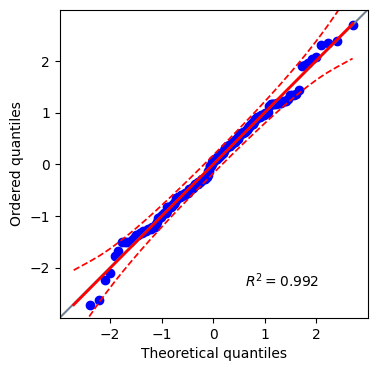

In [20]:
random.seed(1)
car = mistat.load_data('CAR')

def mean_of_sample_with_replacement(x, n):
  sample = random.choices(x, k=n)
  return np.mean(sample)

means = [mean_of_sample_with_replacement(car['mpg'], 64)
         for _ in range(200)]

fig, ax = plt.subplots(figsize=[4, 4])
pg.qqplot(means, ax=ax)
plt.show()

In [21]:
S = np.std(car['mpg'], ddof=1)
print('standard deviation of mpg', S)
print('S/8', S/8)
S_resample = np.std(means, ddof=1)
print('S.E.\{X\}', S_resample)

standard deviation of mpg 3.9172332424696052
S/8 0.48965415530870066
S.E.\{X\} 0.44718791755315535


# Exercise 43

In [22]:
random.seed(1)
yarnstrg = mistat.load_data('YARNSTRG')

def confidence_interval(x, nsigma=2):
  sample_mean = np.mean(x)
  sigma = np.std(x, ddof=1) / np.sqrt(len(x))
  return (sample_mean - 2 * sigma, sample_mean + 2 * sigma)

mean = np.mean(yarnstrg)
outside = 0
for _ in range(500):
  sample = random.choices(yarnstrg, k=30)
  ci = confidence_interval(sample)
  if mean < ci[0] or ci[1] < mean:
    outside += 1

hat_alpha = outside / 500

ci = confidence_interval(yarnstrg)
print(f' Mean: {mean}')
print(f' 2-sigma-CI: {ci[0]:.1f} - {ci[1]:.1f}')
print(f' proportion outside: {hat_alpha:.3f}')

 Mean: 2.9238429999999993
 2-sigma-CI: 2.7 - 3.1
 proportion outside: 0.068


# Exercise 44

In [23]:
random.seed(1)
car = mistat.load_data('CAR')
us_cars = car[car['origin'] == 1]
us_turn = list(us_cars['turn'])

sample_means = []
for _ in range(100):
  x = random.choices(us_turn, k=58)
  sample_means.append(np.mean(x))

is_larger = sum(m > 37.406 for m in sample_means)
ratio = is_larger / len(sample_means)
print(ratio)

0.23


# Exercise 45

In [24]:
stats.binom(50, 0.03).ppf(0.95)

4.0

# Exercise 46

In [25]:
random.seed(1)
cyclt = mistat.load_data('CYCLT')

B = pg.compute_bootci(cyclt, func=np.mean, n_boot=1000,
                      confidence=0.95, return_dist=True, seed=1)

ci_mean, dist_mean = B
print(f' Mean: {np.mean(dist_mean):.3f}')
print(f' 95%-CI: {ci_mean[0]:.3f} - {ci_mean[1]:.3f}')

B = pg.compute_bootci(cyclt, func=lambda x: np.std(x, ddof=1), n_boot=1000,
                      confidence=0.95, return_dist=True, seed=1)

ci_std, dist_std = B
print(f' Mean: {np.mean(dist_std):.3f}')
print(f' 95%-CI: {ci_std[0]:.3f} - {ci_std[1]:.3f}')

 Mean: 0.652
 95%-CI: 0.550 - 0.760
 Mean: 0.370
 95%-CI: 0.340 - 0.400


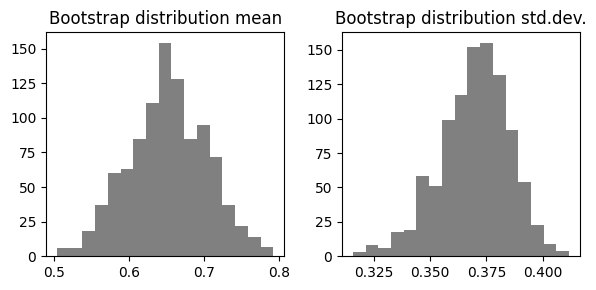

In [26]:
fig, axes = plt.subplots(figsize=[6, 3], ncols=2)
axes[0].hist(dist_mean, color='grey', bins=17)
axes[1].hist(dist_std, color='grey', bins=17)
axes[0].set_title('Bootstrap distribution mean')
axes[1].set_title('Bootstrap distribution std.dev.')
plt.tight_layout()
plt.show()

# Exercise 47

In [27]:
cyclt = mistat.load_data('CYCLT')
ebd = {}
for quantile in (1, 2, 3):
  B = pg.compute_bootci(cyclt, func=lambda x: np.quantile(x, 0.25 * quantile),
                        n_boot=1000, confidence=0.95, return_dist=True, seed=1)
  ci, dist = B
  ebd[quantile] = dist
  print(f'Quantile {quantile}: {np.mean(dist):.3f} 95%-CI: {ci[0]:.3f} - {ci[1]:.3f}')

Quantile 1: 0.306 95%-CI: 0.230 - 0.420
Quantile 2: 0.573 95%-CI: 0.380 - 1.010
Quantile 3: 1.060 95%-CI: 0.660 - 1.090


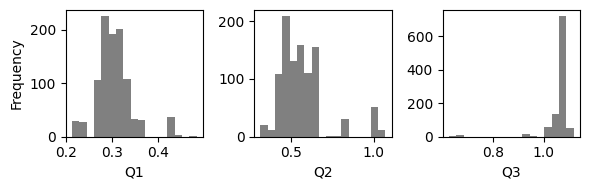

In [28]:
fig, axes = plt.subplots(figsize=[6, 2], ncols=3)
axes[0].hist(ebd[1], color='grey', bins=17)
axes[1].hist(ebd[2], color='grey', bins=17)
axes[2].hist(ebd[3], color='grey', bins=17)
axes[0].set_xlabel('Q1')
axes[1].set_xlabel('Q2')
axes[2].set_xlabel('Q3')
axes[0].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Exercise 48

In [29]:
socell = mistat.load_data('SOCELL')
t1 = socell['t1']
t2 = socell['t2']

# use the index
idx = list(range(len(socell)))
def sample_correlation(x):
  return stats.pearsonr(t1[x], t2[x])[0]

B = pg.compute_bootci(idx, func=sample_correlation,
                      n_boot=1000, confidence=0.95, return_dist=True, seed=1)
ci, dist = B
print(f'rho_XY: {np.mean(dist):.3f} 95%-CI: {ci[0]:.3f} - {ci[1]:.3f}')

rho_XY: 0.975 95%-CI: 0.940 - 0.990


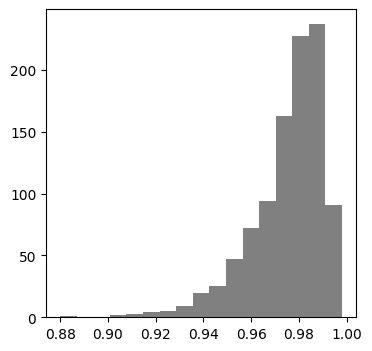

In [30]:
fig, ax = plt.subplots(figsize=[4, 4])
ax.hist(dist, color='grey', bins=17)
plt.show()

# Exercise 49

In [31]:
car = mistat.load_data('CAR')
mpg = car['mpg']
hp = car['hp']

idx = list(range(len(mpg)))
sample_intercept = []
sample_slope = []
for _ in range(1000):
  x = random.choices(idx, k=len(idx))
  result = stats.linregress(hp[x], mpg[x])
  sample_intercept.append(result.intercept)
  sample_slope.append(result.slope)

ci = np.quantile(sample_intercept, [0.025, 0.975])
print(f'intercept (a): {np.mean(sample_intercept):.3f} ' +
      f'95%-CI: {ci[0]:.3f} - {ci[1]:.3f}')
ci = np.quantile(sample_slope, [0.025, 0.975])
print(f'slope (b): {np.mean(sample_slope):.4f} ' +
      f'95%-CI: {ci[0]:.4f} - {ci[1]:.4f}')

reg = stats.linregress(hp, mpg)
hm = np.mean(hp)

print(np.std(sample_intercept))
print(np.std(sample_slope))

intercept (a): 30.724 95%-CI: 28.766 - 32.691
slope (b): -0.0741 95%-CI: -0.0891 - -0.0599
1.0170449375724464
0.0074732552885114645


# Exercise 50

In [32]:
cyclt = mistat.load_data('CYCLT')
X50 = np.mean(cyclt)
SD50 = np.std(cyclt)
result = stats.ttest_1samp(cyclt, 0.55)
print(f'Xmean_50 = {X50:.3f}')
print(result)

B = pg.compute_bootci(cyclt, func=np.mean, n_boot=1000,
                      confidence=0.95, return_dist=True, seed=1)
ci_mean, dist = B
pstar = sum(dist < 0.55) / len(dist)
print(f'p*-value: {pstar}')

Xmean_50 = 0.652
TtestResult(statistic=1.9425149510299369, pvalue=0.057833259176805, df=49)
p*-value: 0.024


# Exercise 51

In [33]:
almpin = mistat.load_data('ALMPIN')
diam1 = almpin['diam1']
diam2 = almpin['diam2']

# calculate the ratio of the two variances:
var_diam1 = np.var(diam1)
var_diam2 = np.var(diam2)
F = var_diam2 / var_diam1
print(f'Variance diam1: {var_diam1:.5f}')
print(f'Variance diam2: {var_diam2:.5f}')
print(f'Ratio: {F:.4f}')

# Calculate the p-value
p_value = stats.f.cdf(F, len(diam1) - 1, len(diam2) - 1)
print(f'p-value: {p_value:.3f}')

Variance diam1: 0.00027
Variance diam2: 0.00032
Ratio: 1.2016
p-value: 0.776


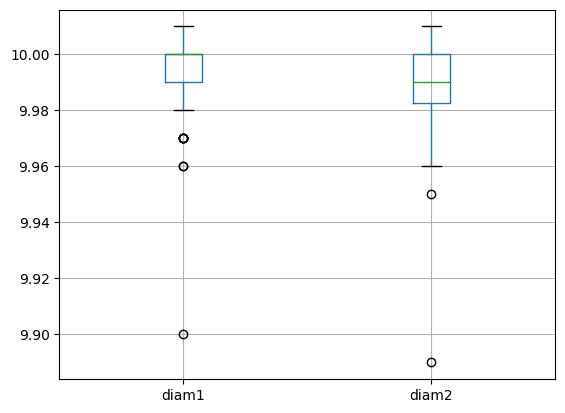

In [34]:
almpin.boxplot(column=['diam1', 'diam2'])
plt.show()

# Exercise 52

In [35]:
almpin = mistat.load_data('ALMPIN')
diam1 = almpin['diam1']
diam2 = almpin['diam2']

# Compare means
mean_diam1 = np.mean(diam1)
mean_diam2 = np.mean(diam2)
print(f'Mean diam1: {mean_diam1:.5f}')
print(f'Mean diam2: {mean_diam2:.5f}')

# calculate studentized difference and p-value
se1, se2 = stats.sem(diam1), stats.sem(diam2)
sed = np.sqrt(se1**2.0 + se2**2.0)
t_stat = (mean_diam1 - mean_diam2) / sed
print(f'Studentized difference: {t_stat:.3f}')
df = len(diam1) + len(diam2) - 2
p = (1 - stats.t.cdf(abs(t_stat), df)) * 2
print(f'p-value: {p:.3f}')

# or use any of the available implementations of the t-test
print(stats.ttest_ind(diam1, diam2))

Mean diam1: 9.99286
Mean diam2: 9.98729
Studentized difference: 1.912
p-value: 0.058
TtestResult(statistic=1.9119658005133064, pvalue=0.05795318184124417, df=138.0)


In [36]:
random.seed(1)

# return studentized distance between random samples from diam1 and diam2
def stat_func():
    d1 = random.choices(diam1, k=len(diam1))
    d2 = random.choices(diam2, k=len(diam2))
    return stats.ttest_ind(d1, d2).statistic

dist = np.array([stat_func() for _ in range(1000)])

pstar = sum(dist < 0) / len(dist)
print(f'p*-value: {pstar}')

p*-value: 0.014


In [37]:
columns = ['diam1', 'diam2']
# variance for each column
S2 = almpin[columns].var(axis=0, ddof=0)
F0 = max(S2) / min(S2)
print('S2', S2)
print('F0', F0)

# Step 1: sample variances of bootstrapped samples for each column
seed = 1
B = {}
for column in columns:
    ci = pg.compute_bootci(almpin[column], func='var', n_boot=500,
                       confidence=0.95, seed=seed, return_dist=True)
    B[column] = ci[1]
Bt = pd.DataFrame(B)

# Step 2: compute Wi
Wi = Bt / S2

# Step 3: compute F*
FBoot = Wi.max(axis=1) / Wi.min(axis=1)
FBoot95 = np.quantile(FBoot, 0.95)
print('FBoot 95%', FBoot95)
pstar = sum(FBoot >= F0)/len(FBoot)
print(f'p*-value: {pstar}')

S2 diam1    0.000266
diam2    0.000320
dtype: float64
F0 1.2016104294478573
FBoot 95% 1.1855457165968324
p*-value: 0.04


# Exercise 53

In [38]:
mpg = mistat.load_data('MPG')
columns = ['origin1', 'origin2', 'origin3']
# variance for each column
S2 = mpg[columns].var(axis=0, ddof=1)
F0 = max(S2) / min(S2)
print('S2', S2)
print('F0', F0)

# Step 1: sample variances of bootstrapped samples for each column
seed = 1
B = {}
for column in columns:
    ci = pg.compute_bootci(mpg[column].dropna(), func='var', n_boot=500,
                       confidence=0.95, seed=seed, return_dist=True)
    B[column] = ci[1]
Bt = pd.DataFrame(B)

# Step 2: compute Wi
Wi = Bt / S2

# Step 3: compute F*
FBoot = Wi.max(axis=1) / Wi.min(axis=1)
FBoot95 = np.quantile(FBoot, 0.95)
print('FBoot 95%', FBoot95)
pstar = sum(FBoot >= F0)/len(FBoot)
print(f'p*-value: {pstar}')

S2 origin1    12.942529
origin2     6.884615
origin3    18.321321
dtype: float64
F0 2.6611975103595213
FBoot 95% 2.6925366761838987
p*-value: 0.058


# Exercise 54

F = 6.076
ratio 0.003


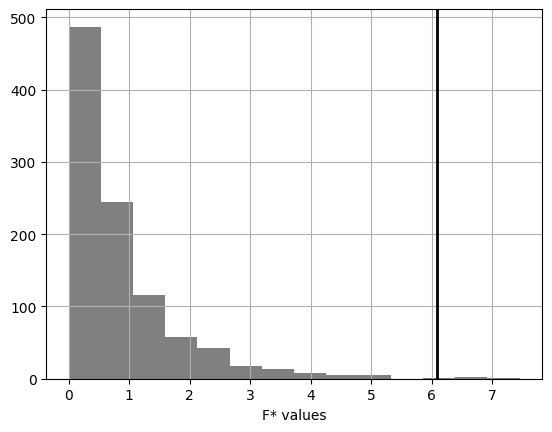

In [39]:
mpg = mistat.load_data('MPG.csv')
samples = [mpg[key].dropna() for key in ['origin1', 'origin2', 'origin3']]

def test_statistic_F(samples):
    return stats.f_oneway(*samples).statistic

# Calculate sample shifts
Ni = np.array([len(sample) for sample in samples])
N = np.sum(Ni)
XBni = np.array([np.mean(sample) for sample in samples])
XBB = np.sum(Ni * XBni) / N
DB = XBni - XBB

F0 = test_statistic_F(samples)
Ns = 1000
Fstar = []
for _ in range(Ns):
    Ysamples  = []
    for sample, DBi in zip(samples, DB):
        Xstar = np.array(random.choices(sample, k=len(sample)))
        Ysamples.append(Xstar - DBi)
    Fs = test_statistic_F(Ysamples)
    Fstar.append(Fs)
Fstar = np.array(Fstar)

print(f'F = {F0:.3f}')
print('ratio', sum(Fstar > F0)/len(Fstar))

ax = pd.Series(Fstar).hist(bins=14, color='grey')
ax.axvline(F0, color='black', lw=2)
ax.set_xlabel('F* values')
plt.show()

# Exercise 55

In [40]:
np.random.seed(1)

def qbinomBoot(x, p):
    return stats.binom.ppf(p, 50, p=x.mean())

for p_real in (0.2, 0.1, 0.05):
    defects = stats.bernoulli.rvs(p_real, size=50)
    B_025 = pg.compute_bootci(defects, func=lambda x: qbinomBoot(x, p=0.025),
                              n_boot=500, seed=1, return_dist=True)
    B_975 = pg.compute_bootci(defects, func=lambda x: qbinomBoot(x, p=0.975),
                              n_boot=500, seed=1, return_dist=True)
    tol_int = [np.quantile(B_025[1], 0.025),np.quantile(B_975[1], 0.975)]
    print(f'Tolerance interval p={p_real}: ({tol_int[0]}, {tol_int[1]})')

Tolerance interval p=0.2: (1.0, 22.0)
Tolerance interval p=0.1: (0.0, 17.0)


Tolerance interval p=0.05: (0.0, 9.0)


# Exercise 56

In [41]:
np.random.seed(1)

def getQuantile(x, p):
    return np.quantile(x, p)

oturb = mistat.load_data('OTURB.csv')
B_025 = pg.compute_bootci(oturb, func=lambda x: getQuantile(x, p=0.025),
                          n_boot=500, seed=1, return_dist=True)
B_975 = pg.compute_bootci(oturb, func=lambda x: getQuantile(x, p=0.975),
                          n_boot=500, seed=1, return_dist=True)
tol_int = [np.quantile(B_025[1], 0.025),np.quantile(B_975[1], 0.975)]
print(f'Tolerance interval ({tol_int[0]}, {tol_int[1]})')

Tolerance interval (0.2399, 0.68305)


# Exercise 57

In [42]:
cyclt = mistat.load_data('CYCLT.csv')
# make use of the fact that a True value is interpreted as 1 and False as 0
print('Values greater 0.7:', sum(cyclt>0.7))

Values greater 0.7: 20


# Exercise 58

In [43]:
oelect = mistat.load_data('OELECT.csv')
print(stats.wilcoxon(oelect-220))

WilcoxonResult(statistic=1916.0, pvalue=0.051047599707252124)


# Exercise 59

In [44]:
car = mistat.load_data('CAR.csv')
fourCylinder = car[car['cyl'] == 4]
uscars = fourCylinder[fourCylinder['origin'] == 1]
foreign = fourCylinder[fourCylinder['origin'] != 1]

print(f'Mean of Sample 1 (U.S. made) {np.mean(uscars["turn"]):.3f}')
print(f'Mean of Sample 2 (foreign) {np.mean(foreign["turn"]):.3f}')

_ = mistat.randomizationTest(uscars['turn'], foreign['turn'], np.mean,
                             aggregate_stats=lambda x: x[0] - x[1],
                             n_boot=1000, seed=1)

Mean of Sample 1 (U.S. made) 36.255
Mean of Sample 2 (foreign) 33.179


Original stat is 3.075758
Original stat is at quantile 1001 of 1001 (100.00%)
Distribution of bootstrap samples:
 min: -2.12, median: 0.01,  max: 2.68
